to be executed after

> `cd src`
 
> `python main.py`

In [1]:
import glob
import cv2
from matplotlib import pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd
import random
from pathlib import Path
from numpy.random import seed
# import tensorflow as tf
from operator import itemgetter

cherrypicked_seed = 42

seed(cherrypicked_seed)
# tf.random.set_seed(cherrypicked_seed)
random.seed(cherrypicked_seed)
 

100%|████████████████████████████████| 100000/100000 [00:02<00:00, 34401.52it/s]


{(28, 40)}
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


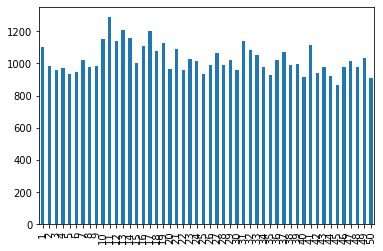

selecting indexes:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50] [43 24  8 41 13 25 14 21  6 31] [43 24  8 41 13]


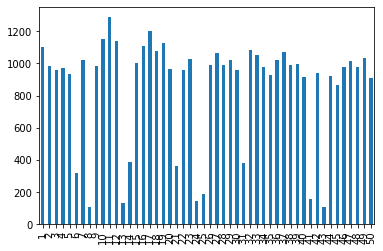

(42983, 2) (100000, 2)
(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), array([1105,  985,  957,  969,  932,  315, 1024,  108,  982, 1152, 1289,
       1139,  134,  385, 1003, 1107, 1199, 1076, 1127,  962,  363,  959,
       1029,  144,  186,  987, 1065,  991, 1024,  959,  380, 1084, 1053,
        977,  929, 1023, 1071,  987,  999,  918,  158,  939,  108,  922,
        868,  975, 1013,  979, 1031,  912]))


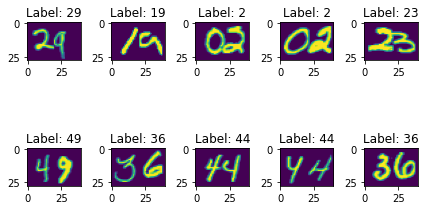

 45%|███████████████▋                   | 4484/10000 [00:00<00:00, 44834.27it/s]

mode train (42983, 28, 40) (42983,)


100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 34450.48it/s]


{(28, 40)}
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
(5096, 2) (10000, 2)
(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), array([111,  94,  93,  83,  98,  78, 103,  97, 101, 117, 127, 126, 120,
       118, 106,  98, 110,  91, 104,  98, 143, 116,  99,  94,  87, 111,
       109,  98, 116, 100, 126, 104, 111, 100,  84, 102,  90,  98,  93,
        86, 114, 102, 109,  80,  87, 102,  93,  97,  93,  79]))


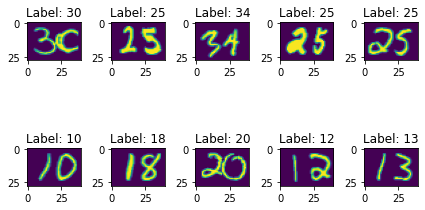

mode test (5096, 28, 40) (5096,)


In [2]:
modes = ["train", "test"]
# modes = ["train"]
def sort_by_name(filepath):
    return(int(Path(filepath).stem))


for mode in modes:
    file_list = sorted(glob.glob(f"./output/{mode}/2/*.png"), key = sort_by_name)
    # file_list[: 100]

    # load all shapes in order to calculate average shapes for the resize
    shapes = [cv2.imread(img_path)[:, :, 0].shape for img_path in tqdm(file_list)]

    mean_h = int(np.mean([shape[0] for shape in shapes], 0))


    mean_w = int(np.mean([shape[1] for shape in shapes], 0))
    mean_w, mean_h

    #load proper img_list
    img_list = [cv2.resize(cv2.imread(img_path)[:, :, 0], (mean_w, mean_h)) for img_path in tqdm(file_list)]
    #check shapes
    print(set([img.shape for img in img_list]))

    labels = pd.read_csv(f"./output/{mode}/labels.csv", header= None, index_col= False, names = ["img_name", "label"] )
    # labels

    if mode == "train":
        #select random labels
        # unique_labels = labels.label.unique()
        # unique_labels = unique_labels[unique_labels>9]
        # print(unique_labels)
        # np.random.shuffle(unique_labels)
        # selected_label_list = unique_labels[:45]
        selected_label_list = np.arange(1, 51)
    print(selected_label_list)
    # selected_label_list = [10, 18, 61, 64, 83, 63, 46, 72, 33, 85]
    # selected_label_list, len(selected_label_list)

    selected_labels = labels[labels.label.isin(selected_label_list)]
#     print(selected_labels.shape, labels.shape)

#     print(np.unique(selected_labels.label, return_counts=True))
    if mode == "train":
        selected_labels.label.value_counts().sort_index(ascending=True).plot(kind = 'bar')
        plt.show()

        sample_selected_label_list = selected_label_list.copy()
        np.random.shuffle(sample_selected_label_list)
        np.random.shuffle(sample_selected_label_list)
        sample_selected_label_list = sample_selected_label_list[:10]
        np.random.shuffle(sample_selected_label_list)
        ssample_selected_label_list = sample_selected_label_list[:5]
        print("selecting indexes: ",selected_label_list, sample_selected_label_list, ssample_selected_label_list)
        # selected_label_list = [10, 18, 61, 64, 83, 63, 46, 72, 33, 85]
        # selected_label_list, len(selected_label_list)

        # sample_selected_labels = selected_labels[selected_labels.label.isin(sample_selected_label_list)]
        not_sampled_selected_labels = selected_labels[~selected_labels.label.isin(sample_selected_label_list)]

        sampled_selected_labels = []
        for label in sample_selected_label_list:
            label_df = selected_labels[selected_labels.label.isin([label])]
            factor = np.random.randint(7,12) if label in ssample_selected_label_list else np.random.randint(3,6)
            sampled_selected_labels.append(label_df.sample(len(label_df)//factor))
        sampled_selected_labels = pd.concat(sampled_selected_labels)
        
        selected_labels = pd.concat([not_sampled_selected_labels, sampled_selected_labels])
        selected_labels.label.value_counts().sort_index(ascending=True).plot(kind = 'bar')
        plt.show()
        
    selected_indexes = selected_labels.index.to_list()
    # selected_indexes[:10]
    print(selected_labels.shape, labels.shape)

    print(np.unique(selected_labels.label, return_counts=True))


    selected_img_list = itemgetter(*selected_indexes)(img_list)
    selected_img_list_pathes = itemgetter(*selected_indexes)(file_list)

    # selected_img_list_pathes



    np_labels = selected_labels.label.to_numpy()
    # type(np_labels), np_labels[:10]

    np_images = np.vstack(np.expand_dims(selected_img_list, 0))
    # np_images.shape

    #a visual check
    fig, ax = plt.subplots(2, 5)
    for i in range(2):
        for j in range(5):

            index = np.random.randint(0, len(np_images))
            # print(np_labels[index])
            # print(selected_img_list_pathes[index])
            ax[i, j].imshow(np_images[index])
            ax[i, j].set_title(f'Label: {np_labels[index]}')
    plt.tight_layout()
    plt.show()
    fig.savefig(f"examples/{mode}_example.png")
    
    # np.save(f"./final_dataset/X_{mode}.npy", np_images)
    # np.save(f"./final_dataset/y_{mode}.npy", np_labels)
    
    np.savez_compressed(f"./final_dataset/X_{mode}.npz", np_images)
    np.savez_compressed(f"./final_dataset/y_{mode}.npz", np_labels)
    
    # print("mode", mode, np.load(f"./final_dataset/X_{mode}.npy").shape, np.load(f"./final_dataset/y_{mode}.npy").shape)
    print("mode", mode, np.load(f"./final_dataset/X_{mode}.npz")["arr_0"].shape, np.load(f"./final_dataset/y_{mode}.npz")["arr_0"].shape)
        

In [3]:
 mode, np.load(f"./final_dataset/X_{mode}.npz")["arr_0"].shape

('test', (5096, 28, 40))

In [4]:
    selected_label_list = np.arange(1, 31)
    down_selected_label_list = selected_label_list.copy()
    np.random.shuffle(down_selected_label_list)
    down_selected_label_list = down_selected_label_list[:5]
    print(selected_label_list, down_selected_label_list)
    # selected_label_list = [10, 18, 61, 64, 83, 63, 46, 72, 33, 85]
    # selected_label_list, len(selected_label_list)

    selected_labels = labels[labels.label.isin(selected_label_list)]
    down_selected_labels = selected_labels[selected_labels.label.isin(down_selected_label_list)]
    not_down_selected_labels = selected_labels[~selected_labels.label.isin(down_selected_label_list)]
    
    sampled = []
    for label in down_selected_label_list:
        label_df = selected_labels[selected_labels.label.isin([label])]
        sampled.append(label_df.sample(len(label_df)//np.random.randint(4,6)))
    # sampled = down_selected_labels.sample(len(down_selected_labels)//5)
    sampled = pd.concat(sampled)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] [17  2 20 10  8]


In [5]:
labels

,img_name,label
0,100000.png,62
1,100001.png,51
2,100002.png,18
3,100003.png,56
4,100004.png,74
...,...,...
9995,109995.png,40
9996,109996.png,16
9997,109997.png,69
9998,109998.png,86


In [6]:
sampled.iloc[0]

img_name    106943.png
label               17
Name: 6943, dtype: object

In [7]:
selected_labels.shape, not_down_selected_labels.shape, down_selected_labels.shape, sampled.shape

((3146, 2), (2630, 2), (516, 2), (121, 2))

In [8]:
final_selected_labels = pd.concat([not_down_selected_labels, sampled])
final_selected_labels 

,img_name,label
2,100002.png,18
5,100005.png,5
6,100006.png,21
13,100013.png,4
15,100015.png,18
...,...,...
953,100953.png,8
8910,108910.png,8
8242,108242.png,8
1255,101255.png,8


<AxesSubplot: >

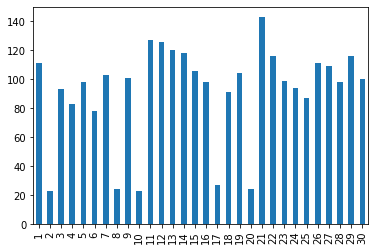

In [9]:
final_selected_labels.label.value_counts().sort_index(ascending=True).plot(kind = 'bar')

<AxesSubplot: >

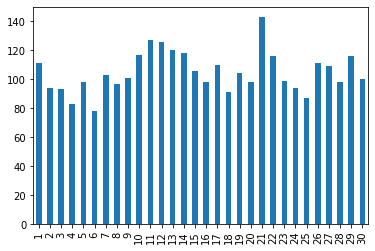

In [10]:
selected_labels.label.value_counts().sort_index(ascending=True).plot(kind = 'bar')